In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
train = pd.read_csv(r"C:\Users\Tushar Sable\Desktop\Day5\train.csv")
test = pd.read_csv(r"C:\Users\Tushar Sable\Desktop\Day5\test.csv")
gender = pd.read_csv(r"C:\Users\Tushar Sable\Desktop\Day5\gender_submission.csv")

In [12]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
train.info()                       
train.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [14]:
missing_counts = train.isnull().sum()
missing_pct = (train.isnull().mean() * 100).round(2)
pd.concat([missing_counts, missing_pct], axis=1, keys=['missing_count', 'missing_pct'])

,missing_count,missing_pct
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,177,19.87
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00


In [15]:
print("Survived:\n", train['Survived'].value_counts(normalize=False))
print("\nSex:\n", train['Sex'].value_counts())
print("\nPclass:\n", train['Pclass'].value_counts())
print("\nEmbarked (incl NaNs):\n", train['Embarked'].value_counts(dropna=False))

Survived:
 Survived
0    549
1    342
Name: count, dtype: int64

Sex:
 Sex
male      577
female    314
Name: count, dtype: int64

Pclass:
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Embarked (incl NaNs):
 Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


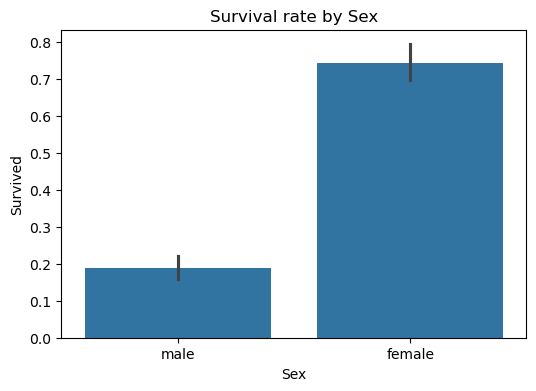

In [16]:
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival rate by Sex')
plt.show()

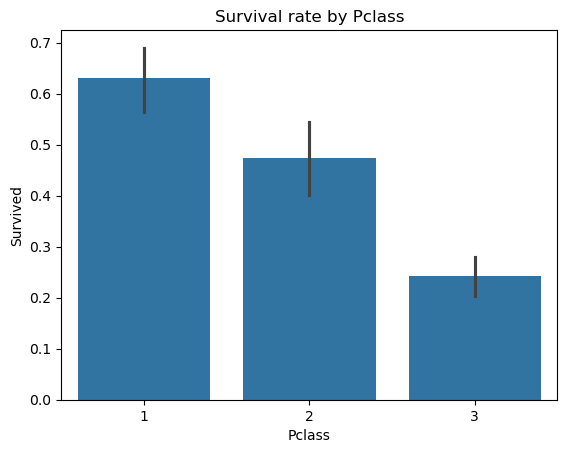

In [17]:
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Survival rate by Pclass')
plt.show()


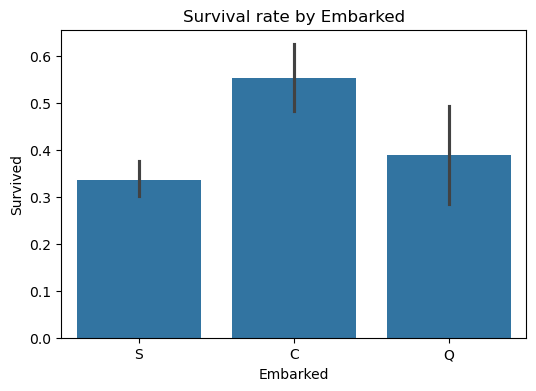

In [18]:
plt.figure(figsize=(6,4))
sns.barplot(x='Embarked', y='Survived', data=train)
plt.title('Survival rate by Embarked')
plt.show()

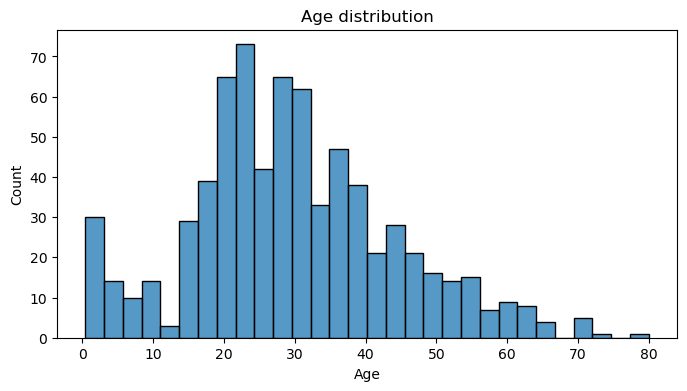

In [19]:
plt.figure(figsize=(8,4))
sns.histplot(train['Age'].dropna(), bins=30)
plt.title('Age distribution')
plt.xlabel('Age')
plt.show()


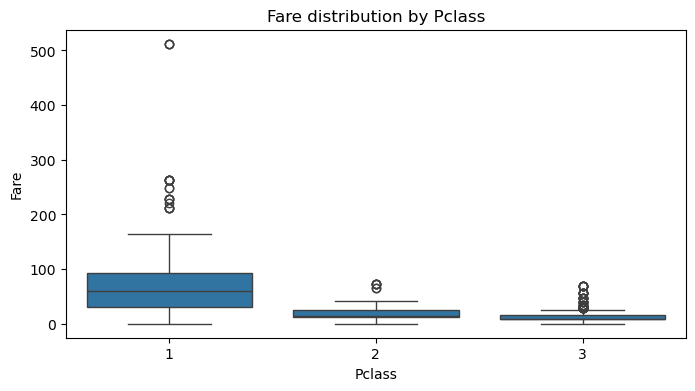

In [20]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Pclass', y='Fare', data=train)
plt.title('Fare distribution by Pclass')
plt.show()


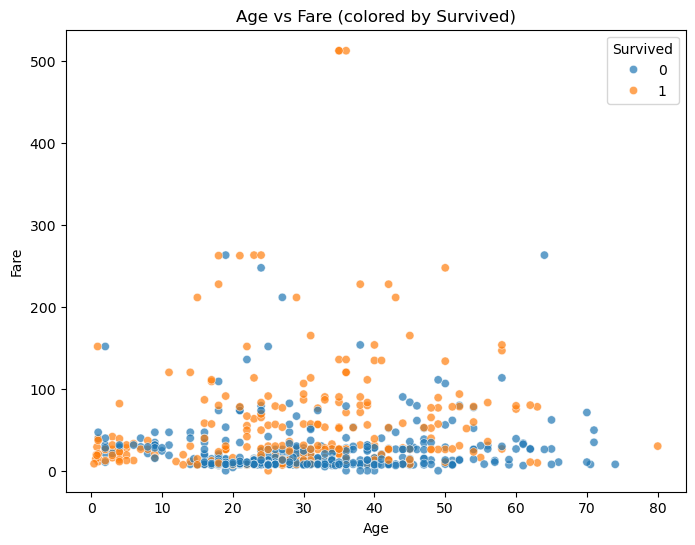

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=train, alpha=0.7)
plt.title('Age vs Fare (colored by Survived)')
plt.show()

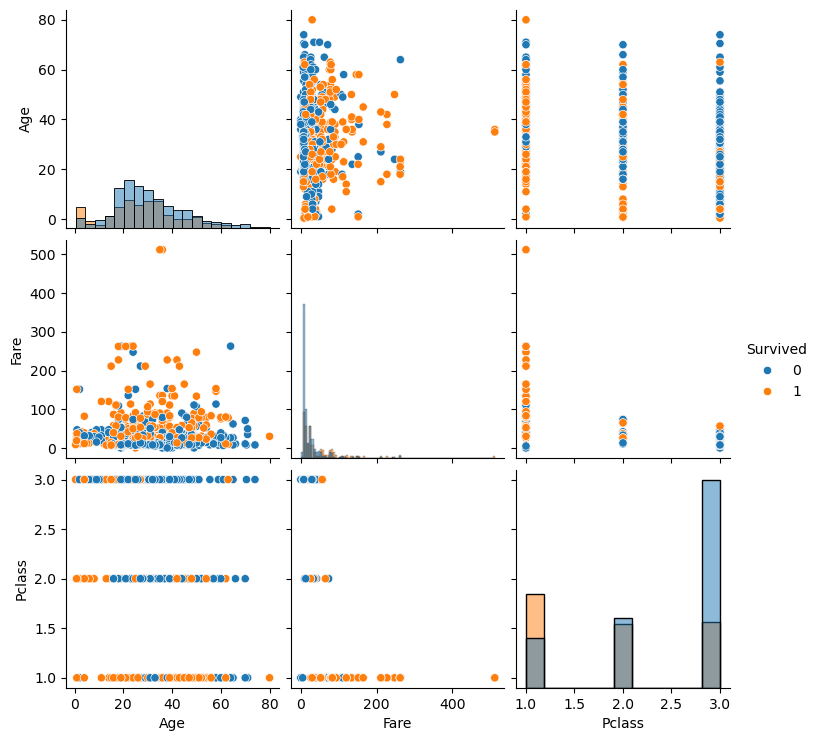

In [23]:
cols = ['Age','Fare','Pclass','SibSp','Parch','Survived']
sns.pairplot(train[cols].dropna(), hue='Survived', diag_kind='hist', vars=['Age','Fare','Pclass'])
plt.show()

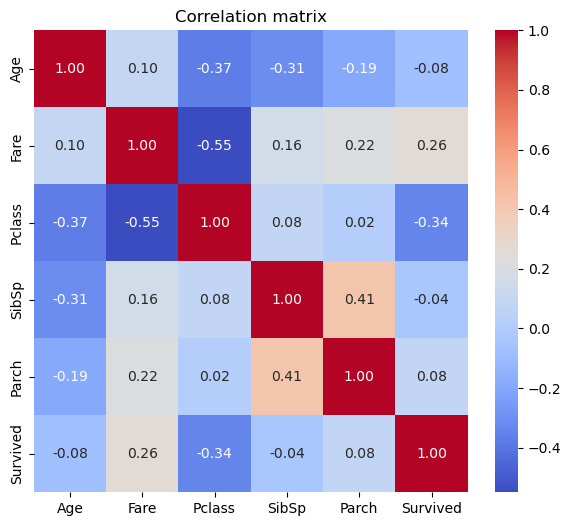

In [24]:
corr = train[cols].corr()
plt.figure(figsize=(7,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [26]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+).', expand=False)
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)
train['HasCabin'] = train['Cabin'].notnull().astype(int)

train[['Title','FamilySize','IsAlone','HasCabin']].head()

,Title,FamilySize,IsAlone,HasCabin
0,Mr,2,0,0
1,Mrs,2,0,1
2,Miss,1,1,0
3,Mrs,2,0,1
4,Mr,1,1,0


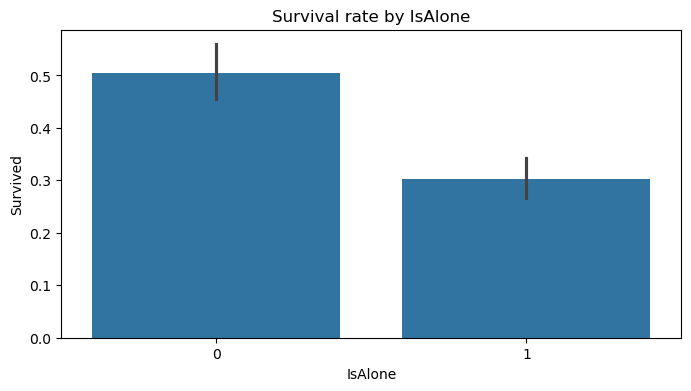

In [27]:
plt.figure(figsize=(8,4))
sns.barplot(x='IsAlone', y='Survived', data=train)
plt.title('Survival rate by IsAlone')
plt.show()


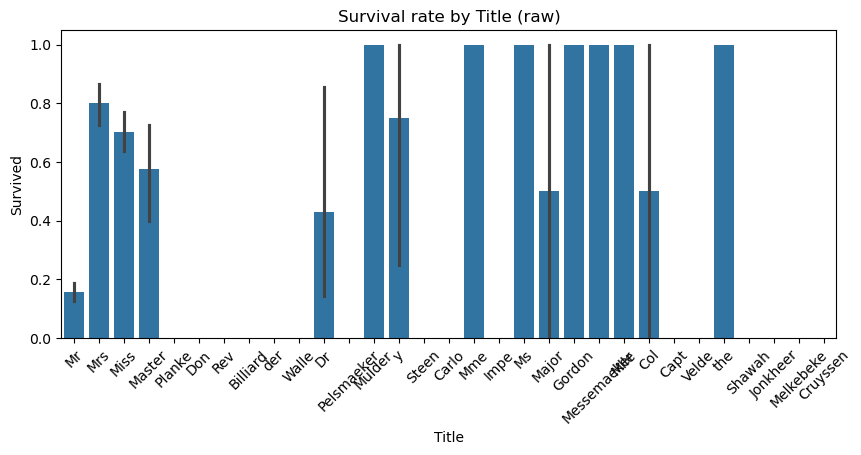

In [28]:
plt.figure(figsize=(10,4))
sns.barplot(x='Title', y='Survived', data=train)
plt.title('Survival rate by Title (raw)')
plt.xticks(rotation=45)
plt.show()

In [29]:
train['Age_filled'] = train['Age'].fillna(train['Age'].median())
train['Embarked_filled'] = train['Embarked'].fillna(train['Embarked'].mode()[0])


In [30]:
train[['Age','Age_filled','Embarked','Embarked_filled']].head()

,Age,Age_filled,Embarked,Embarked_filled
0,22.0,22.0,S,S
1,38.0,38.0,C,C
2,26.0,26.0,S,S
3,35.0,35.0,S,S
4,35.0,35.0,S,S


In [31]:
train.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [32]:
train[['Survived','Pclass','Age','Fare','SibSp','Parch']].corr()['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

In [35]:
train.groupby('Pclass')['Survived'].mean()


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64